# Introduction au traitement du signal
## Conversion analogique numérique
### Choix d'un signal analogique

Soit un signal analogique sinusoïdal de fréquence 1 Hz (période 1 s). 

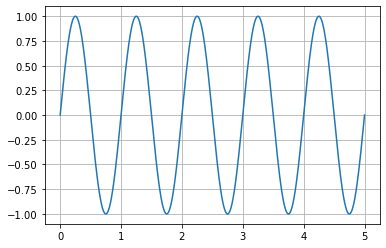

In [34]:
import numpy as np
import matplotlib.pyplot as plt

T = 1             # Période (s)
om = 2*np.pi/T    # Pulsation (rad/s)
les_t = np.linspace(0,5,10000)
def make_signal(les_t):
    return np.sin(om*les_t)
les_e = make_signal(les_t)
plt.grid()
plt.plot(les_t,les_e)

### Echantillonnage du signal
#### Raisonnement naïf

In [35]:
def echantillonnage(les_t,les_e,fe):
    """
     * les_t : temps
     * les_e : signal analogique d'entrée
     * fe : fréquence d'échantillonnage
    """
    les_te = [les_t[0]]
    les_s = [les_e[0]]
    k = 1
    for i in range(len(les_t)):
        if les_t[i]>k*1/fe :
            les_te.append(les_t[i])
            les_s.append(les_e[i])
            k = k+1
    return les_te,les_s

Text(0.5, 1.0, 'Echantillonnage à 50 Hz')

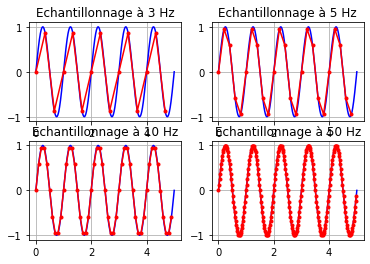

In [36]:
les_te1,les_s1 = echantillonnage(les_t,les_e,3)
les_te2,les_s2 = echantillonnage(les_t,les_e,5)
les_te3,les_s3 = echantillonnage(les_t,les_e,10)
les_te4,les_s4 = echantillonnage(les_t,les_e,50)

fig, axs = plt.subplots(2, 2)

#fig.suptitle('Horizontally stacked subplots')
# Grilles
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

# Entrée
axs[0, 0].plot(les_t,les_e,"b")
axs[0, 1].plot(les_t,les_e,"b")
axs[1, 0].plot(les_t,les_e,"b")
axs[1, 1].plot(les_t,les_e,"b")

# Sorties filtrées
axs[0, 0].plot(les_te1,les_s1,"r.-")
axs[0, 1].plot(les_te2,les_s2,"r.-")
axs[1, 0].plot(les_te3,les_s3,"r.-")
axs[1, 1].plot(les_te4,les_s4,"r.-")

# Titres des graphiques
axs[0, 0].set_title("Echantillonnage à 3 Hz")
axs[0, 1].set_title("Echantillonnage à 5 Hz")
axs[1, 0].set_title("Echantillonnage à 10 Hz")
axs[1, 1].set_title("Echantillonnage à 50 Hz")

####  Un autre style de naïveté...

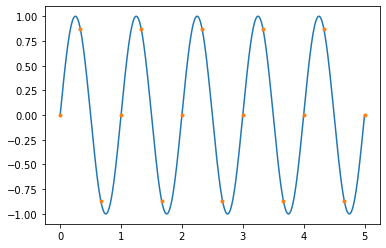

In [40]:
fe = 3
N = int(les_t[-1]*fe) # Nombre d'échantillons pour un horizon temporel et une fréquence donnée
les_te = np.linspace(0,N/fe,N+1)
plt.plot(les_t,les_e)
plt.plot(les_te,make_signal(les_te),".")